# **PREDICTION OF AGE BASED ON RING VALUE**

# **Setting the Spark Environment**

---


In [1]:
!apt-get update #update linux
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #download and install openjdk
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz #download spark binary (gunzip). -q: Turn off Wget’s output.
!tar xf spark-3.2.1-bin-hadoop2.7.tgz #extract the spark package
!pip install -q findspark #install the findspark package

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [89.9 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [903 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports In

In [2]:
#set environment variables
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [3]:
# From Spark 2.0, SparkSession provides a common entry point for a Spark application
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark.conf.set('spark.sql.shuffle.partitions', 6)
# spark.conf.set('spark.executor.memory', '2g')
spark

# **Fetching Data**
# **Read File Data Using Spark**
---



In [4]:
from pyspark.sql.types import *

ordersSchema = StructType([
  StructField("Sex", StringType(), True),
  StructField("Length", StringType(), True),
  StructField("Diameter", StringType(), True),
  StructField("Height", StringType(), True),
  StructField("Whole weight", StringType(), True),
  StructField("Shucked weight", StringType(), True),
  StructField("Viscera weight", StringType(), True),
  StructField("Shell weight", StringType(), True),
  StructField("Rings", StringType(), True)])

df = (spark.read
          .schema(ordersSchema)
          .format("csv")
          .load("sample_data/abalone.data"))

Dsiplay top 5 rows of the data

In [5]:
df.show(5) 

+---+------+--------+------+------------+--------------+--------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------+------------+-----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7|
+---+------+--------+------+------------+--------------+--------------+------------+-----+
only showing top 5 rows



# **Data Cleaning and Transformation**

Convert the dataframe to pandas

In [6]:
df.toPandas()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
4173,M,0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
4174,M,0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9
4175,F,0.625,0.485,0.15,1.0945,0.531,0.261,0.296,10


Count Number of Rows in the data

In [7]:
# How many rows we have
df.count()

4177

Display the columns in the datafile

In [8]:
df.columns

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

Check datatypes of different columns

In [9]:
df.dtypes

[('Sex', 'string'),
 ('Length', 'string'),
 ('Diameter', 'string'),
 ('Height', 'string'),
 ('Whole weight', 'string'),
 ('Shucked weight', 'string'),
 ('Viscera weight', 'string'),
 ('Shell weight', 'string'),
 ('Rings', 'string')]

Get Summary of the data

In [10]:
df.describe().toPandas()

,summary,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,count,4177,4177,4177,4177,4177,4177,4177,4177,4177
1,mean,None,0.5239920995930099,0.407881254488869,0.1395163993296614,0.82874215944458,0.35936748862820106,0.18059360785252604,0.23883085946851795,9.933684462532918
2,stddev,None,0.12009291256479936,0.09923986613365941,0.04182705660725731,0.49038901823099795,0.22196294903322014,0.10961425025968445,0.13920266952238622,3.2241690320681315
3,min,F,0.075,0.055,0,0.002,0.001,0.0005,0.0015,1
4,max,M,0.815,0.65,1.13,2.8255,1.488,0.76,1.005,9


Convert the data types to required datatypes for different columns

In [11]:
from pyspark.sql.functions import col
dataset = df.select(col('Sex'),
                         col('Length').cast('float'),
                         col('Diameter').cast('float'),
                         col('Height').cast('float'),
                         col('Whole weight').cast('float'),
                         col('Shucked weight').cast('float'),
                         col('Viscera weight').cast('float'),
                         col('Shell weight').cast('float'),
                         col('Rings').cast('integer')
                        )
dataset2=dataset
dataset.show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------+------------+-----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|    8|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|        0.1415|        0.33|   20|
|  F| 0.545|   0.425| 0.125|       0.768|         0.294|        0.1495|        0.26|   16|

Count for Null values in data

In [12]:
from pyspark.sql.functions import isnull, when, count, col
dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns]).show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------+------------+-----+
|  0|     0|       0|     0|           0|             0|             0|           0|    0|
+---+------+--------+------+------------+--------------+--------------+------------+-----+



Convert Sex Column to a binary datatype

In [13]:
from pyspark.ml.feature import StringIndexer
dataset = StringIndexer(
    inputCol='Sex', 
    outputCol='Gender', 
    handleInvalid='keep').fit(dataset).transform(dataset)

dataset.show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+------+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|Gender|
+---+------+--------+------+------------+--------------+--------------+------------+-----+------+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|   0.0|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7|   0.0|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|   2.0|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|   0.0|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7|   1.0|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|    8|   1.0|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|        0.1415|        0.33|   20|   2.0|
|  F| 0.545|   0.425

# **Advanced Transformation of Data**

In [14]:
# Assemble all the features with VectorAssembler
required_features = ['Gender',
                    'Length',
                    'Diameter',
                    'Height',
                    'Whole weight',
                    'Shucked weight',
                     'Viscera weight',
                     'Shell weight'
                   ]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(dataset)

transformed_data.show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+------+--------------------+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weight|Shell weight|Rings|Gender|            features|
+---+------+--------+------+------------+--------------+--------------+------------+-----+------+--------------------+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|   0.0|[0.0,0.4550000131...|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7|   0.0|[0.0,0.3499999940...|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|   2.0|[2.0,0.5299999713...|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|   0.0|[0.0,0.4399999976...|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7|   1.0|[1.0,0.3300000131...|
|  I| 0.425|     0.3| 0.095|      0.3515|       

# **Splitting the Data**

In [16]:
splits = transformed_data.randomSplit([0.8, 0.2])
train_df = splits[0]
test_df = splits[1]

# **Applying Different Models and Choose one with High Accuracy**

**Linear Regression**

In [17]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Rings', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.4349330966248969,8.261111524897343,0.0,0.0,0.0,10.389987912251183]
Intercept: 6.090876492607674


In [18]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 2.478900
r2: 0.400528


In [19]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","Rings","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Rings",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-----------------+-----+--------------------+
|       prediction|Rings|            features|
+-----------------+-----+--------------------+
| 7.23456372059074|    7|[2.0,0.3050000071...|
|7.423478320529087|    6|[2.0,0.3400000035...|
|7.867793275973023|    8|[2.0,0.3700000047...|
|7.900629147379243|   10|[2.0,0.3700000047...|
|8.203267773907971|    7|[2.0,0.375,0.2949...|
+-----------------+-----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.362588


**RMSE on Test Data for Linear Regression Model**

In [20]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 2.64551


**DecisionTreeRegressor**

In [21]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Rings')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_predictions.select("prediction","Rings","features").show(5)

+------------------+-----+--------------------+
|        prediction|Rings|            features|
+------------------+-----+--------------------+
| 6.511111111111111|    7|[2.0,0.3050000071...|
|5.9361702127659575|    6|[2.0,0.3400000035...|
|  8.11111111111111|    8|[2.0,0.3700000047...|
|              9.04|   10|[2.0,0.3700000047...|
|              9.04|    7|[2.0,0.375,0.2949...|
+------------------+-----+--------------------+
only showing top 5 rows



**RMSE on Test Data for DecisionTreeRegressor**

In [22]:
from pyspark.ml.evaluation import RegressionEvaluator
dt_evaluator = RegressionEvaluator(
    labelCol="Rings", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.44945


**GBTRegressor**

In [23]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Rings', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'Rings', 'features').show(5)

+-----------------+-----+--------------------+
|       prediction|Rings|            features|
+-----------------+-----+--------------------+
|6.487252436806672|    7|[2.0,0.3050000071...|
|5.912311538461519|    6|[2.0,0.3400000035...|
|8.273471916052658|    8|[2.0,0.3700000047...|
| 9.14660238117657|   10|[2.0,0.3700000047...|
| 9.17136132263727|    7|[2.0,0.375,0.2949...|
+-----------------+-----+--------------------+
only showing top 5 rows



**RMSE on Test Data for GBTRegressor**

In [24]:
gbt_evaluator = RegressionEvaluator(
    labelCol="Rings", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.41719


## **Since GBTRegressor has least RMSE value on test data so we can consider that this model predicts the most accurate values than all other models**

# **VISUALIZATIONS OF DATA**

**AVERAGE RING VALUE FOR THE THREE GENDERS I.E. MALE, FEMALE AND INFANT**

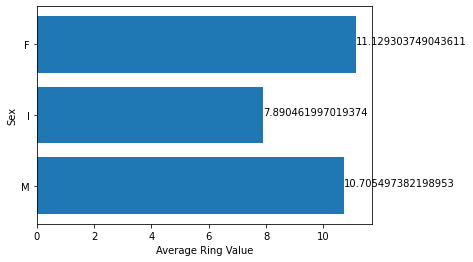

In [25]:
import numpy as np
import matplotlib.pyplot as plt
df = dataset.groupBy("Sex").agg({"Rings":"avg"})
#df.show()
gender=list(df.select('Sex').toPandas()['Sex'])
avg=list(df.select('avg(Rings)').toPandas()['avg(Rings)'])
#gender
#avg
#np.array(df.select("Sex","avg(Rings)").collect())
x = np.array(gender)
y = np.array(avg)

plt.barh(x,y)
for index, value in enumerate(avg):
    plt.text(value, index,
             str(value))

plt.xlabel("Average Ring Value")
plt.ylabel("Sex")   
plt.show()

**COUNT OF RING VALUES FOR THE THREE GENDERS I.E. MALE, FEMALE AND INFANT**

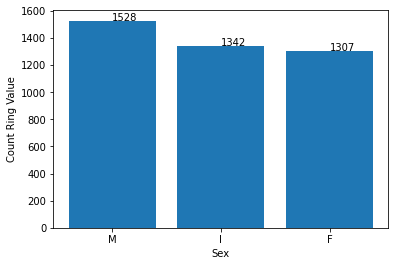

In [26]:
import numpy as np
import matplotlib.pyplot as plt
df = dataset.groupBy("Sex").agg({"Rings":"count"})
#dataset.show()
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)+0):
        plt.text(i,y_list[i-0],y_list[i-0])
        

sex=list(df.select('Sex').toPandas()['Sex'])
avg=list(df.select('count(Rings)').toPandas()['count(Rings)'])
x = np.array(sex)
y = np.array(avg)
plt.bar(x,y)
add_value_label(x,y)
#plt.text(0,y[0],y[0])
#plt.text(1,y[1],y[1])
#plt.text(2,y[2],y[2])
plt.xlabel("Sex")
plt.ylabel("Count Ring Value")
plt.show()

**AVERAGE SHELL WEIGHT FOR THREE GENDERS I.E. MALE, FEMALE AND INFANT**

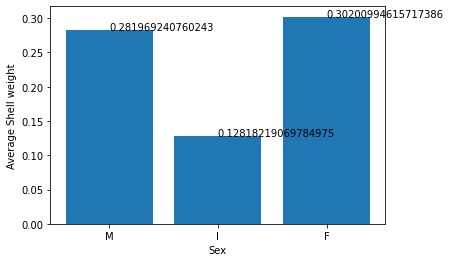

In [27]:
import numpy as np
import matplotlib.pyplot as plt
#dataset.show()
df = dataset.groupBy("Sex").agg({"Shell weight":"avg"})
#df.show()
sex=list(df.select('Sex').toPandas()['Sex'])
avg=list(df.select('avg(Shell weight)').toPandas()['avg(Shell weight)'])
x = np.array(sex)
y = np.array(avg)

plt.bar(x,y)
plt.text(0,y[0],y[0])
plt.text(1,y[1],y[1])
plt.text(2,y[2],y[2])   
plt.xlabel("Sex")
plt.ylabel("Average Shell weight")
plt.show()

**AVERAGE VISCERA WEIGHT FOR THREE GENDERS I.E. MALE, FEMALE AND INFANT**

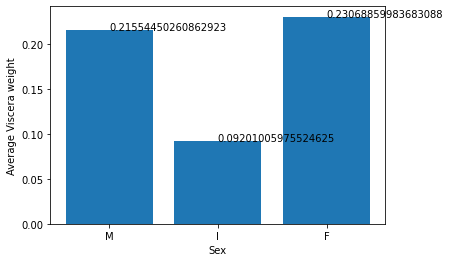

In [28]:
import numpy as np
import matplotlib.pyplot as plt
#dataset.show()
df = dataset.groupBy("Sex").agg({"Viscera weight":"avg"})
#df.show()
sex=list(df.select('Sex').toPandas()['Sex'])
avg=list(df.select('avg(Viscera weight)').toPandas()['avg(Viscera weight)'])
x = np.array(sex)
y = np.array(avg)

plt.bar(x,y)
plt.text(0,y[0],y[0])
plt.text(1,y[1],y[1])
plt.text(2,y[2],y[2])
plt.xlabel("Sex")
plt.ylabel("Average Viscera weight")
plt.show()

**AVERAGE SHUCKED WEIGHT FOR THREE GENDERS I.E. MALE, FEMALE AND INFANT**

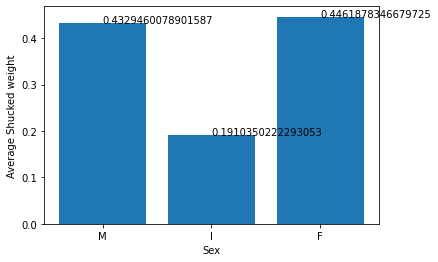

In [29]:
import numpy as np
import matplotlib.pyplot as plt
#dataset.show()
df = dataset.groupBy("Sex").agg({"Shucked weight":"avg"})
#df.show()
sex=list(df.select('Sex').toPandas()['Sex'])
avg=list(df.select('avg(Shucked weight)').toPandas()['avg(Shucked weight)'])
x = np.array(sex)
y = np.array(avg)

plt.bar(x,y)
plt.text(0,y[0],y[0])
plt.text(1,y[1],y[1])
plt.text(2,y[2],y[2])
plt.xlabel("Sex")
plt.ylabel("Average Shucked weight")
plt.show()

**COUNT OF RING VALUES IN THE DATASET**

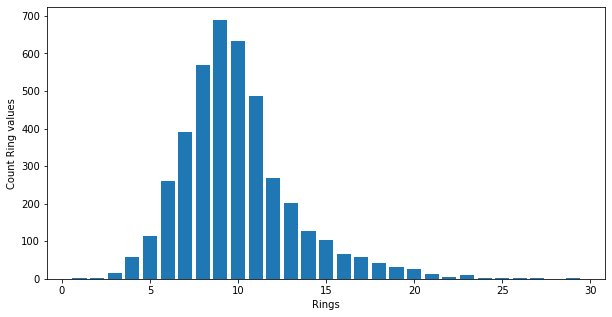

In [30]:
import numpy as np
import matplotlib.pyplot as plt
#dataset.show()
df = dataset.groupBy("Rings").agg({"Rings":"count"})
#df.show()

rings=list(df.select('Rings').toPandas()['Rings'])
avg=list(df.select('count(Rings)').toPandas()['count(Rings)'])
x = np.array(rings)
y = np.array(avg)
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(x,y)

plt.xlabel("Rings")
plt.ylabel("Count Ring values")
plt.show()

**AVERAGE DIAMETER FOR THE DIFFERENT RINGS IN DATASET**

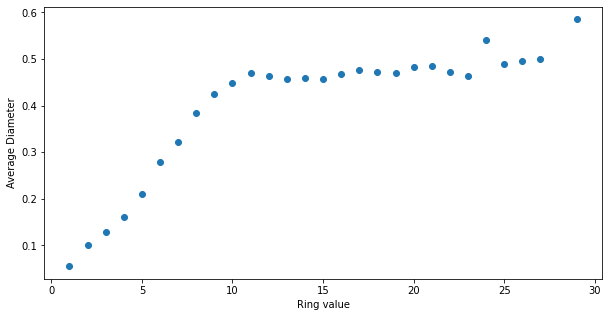

In [31]:
import numpy as np
import matplotlib.pyplot as plt
#dataset.show()
df = dataset.groupBy("Rings").agg({"Diameter":"avg"})
rings=list(df.select('Rings').toPandas()['Rings'])
avg=list(df.select('avg(Diameter)').toPandas()['avg(Diameter)'])
x = np.array(rings)
y = np.array(avg)
  
plt.scatter(x, y)
plt.xlabel('Ring value')
plt.ylabel('Average Diameter')
plt.show()

# **Business Questions**

In [33]:
from pyspark.sql.types import *

Abalone = "Abalone.csv"

# create schema
AbaloneSchema = StructType([
  StructField("Sex", StringType(), True),
  StructField("Length", DoubleType(), True),
  StructField("Diameter", DoubleType(), True),
  StructField("Height", DoubleType(), True),
  StructField("Whole weight", DoubleType(), True),
  StructField("Shucked weight", DoubleType(), True),
  StructField("Viscera weight", DoubleType(), True),
  StructField("Shell weight", DoubleType(), True),
  StructField("Rings", DoubleType(), True)])

# create DataFrame 
df_anal = (
    spark
      .read
      .schema(AbaloneSchema)
      .csv(Abalone)
)

# create table for SQL analytics
df_anal=spark.read.option("header","true").csv(Abalone).withColumnRenamed("Whole weight","Whole_weight").withColumnRenamed("Shucked weight","Shucked_weight")
df_anal.createOrReplaceTempView("abalone_anal")
df_anal.show()

+---+------+--------+------+------------+--------------+--------------+------------+-----+
|Sex|Length|Diameter|Height|Whole_weight|Shucked_weight|Viscera weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------+------------+-----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|         0.101|        0.15|   15|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|        0.0485|        0.07|    7|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|        0.1415|        0.21|    9|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|         0.114|       0.155|   10|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|        0.0395|       0.055|    7|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|        0.0775|        0.12|    8|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|        0.1415|        0.33|   20|
|  F| 0.545|   0.425| 0.125|       0.768|         0.294|        0.1495|        0.26|   16|

In [34]:
#Import related libraries for data visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Q1 - The Proportion of Sex of Abalone

In [35]:
#Q1 - The Proportion of Sex of Abalone

df_gender = spark.sql("SELECT Sex,Count(Rings) as Count FROM abalone_anal Group by Sex")
df_gender.show()


+---+-----+
|Sex|Count|
+---+-----+
|  M| 1528|
|  I| 1342|
|  F| 1307|
+---+-----+



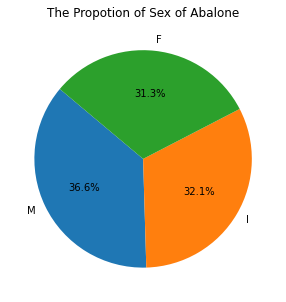

In [36]:
#Running Query
plt.rcParams["figure.figsize"] = [8, 5]
df1 = df_gender.toPandas()
df2 = df_gender.toPandas()
#Creating Visualization
fig = plt.pie(df2['Count'], autopct='%1.1f%%', startangle=140,labels=df2['Sex'])
plt.title('The Propotion of Sex of Abalone')
plt.show()

#Q2 - Top Length of Female and Male Abalone

In [37]:
#Q2 - Top Length of Female and Male Abalone

df_length_m = spark.sql("SELECT Sex,Length FROM abalone_anal where Sex='M' order by 'Length'")
df_m_top=df_length_m.sort(col("Length").desc())
df_m_top.show(1)

df_length_f = spark.sql("SELECT Sex,Length FROM abalone_anal where Sex='F' order by 'Length'")
df_f_top=df_length_f.sort(col("Length").desc())
df_f_top.show(1)


+---+------+
|Sex|Length|
+---+------+
|  M|  0.78|
+---+------+
only showing top 1 row

+---+------+
|Sex|Length|
+---+------+
|  F| 0.815|
+---+------+
only showing top 1 row



#Q3 - Average Whole Weight of Abalone

In [38]:
#Q3 - Averarge Whole Weight of Abalone

df_whole_weight = spark.sql("SELECT Sex,round(Avg(Whole_weight),2) as Average_Whole_Weight FROM abalone_anal Group by Sex order by Average_Whole_Weight")
df_whole_weight.show()


+---+--------------------+
|Sex|Average_Whole_Weight|
+---+--------------------+
|  I|                0.43|
|  M|                0.99|
|  F|                1.05|
+---+--------------------+



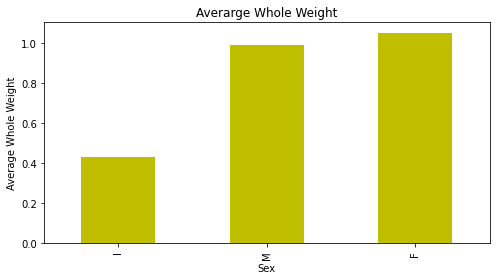

In [39]:
df_pd= df_whole_weight.toPandas()

# Set the figure size
plt.rcParams["figure.figsize"] = [7,4]
plt.rcParams["figure.autolayout"] = True

rows = ['Sex']
columns = ['Average_Whole_Weight']
result = df_pd.head(3)
result.set_index("Sex").plot.bar(title='Averarge Whole Weight',xlabel='Sex', ylabel = 'Average Whole Weight',legend=False,color='y')

plt.show()

#Q4 - Comparison of Whole and Shucked Weight (Average)

In [40]:
#Q4 - Comparison of Whole and Shucked Weight (Average)

df_whole_shucked = spark.sql("SELECT Sex,round(Avg(Whole_weight),2) as Average_Whole_Weight,\
round(Avg(Shucked_weight),2) as Average_Shucked_Weight FROM abalone_anal Group by Sex order by Average_Whole_Weight")
df_whole_shucked.show()

+---+--------------------+----------------------+
|Sex|Average_Whole_Weight|Average_Shucked_Weight|
+---+--------------------+----------------------+
|  I|                0.43|                  0.19|
|  M|                0.99|                  0.43|
|  F|                1.05|                  0.45|
+---+--------------------+----------------------+



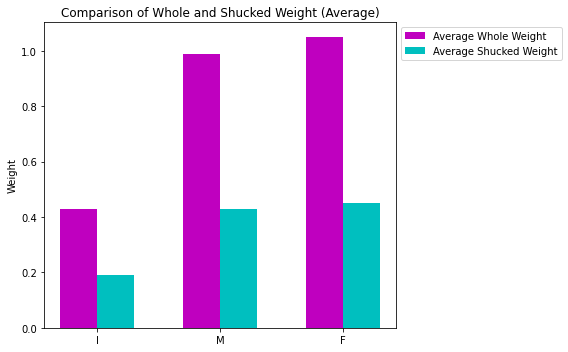

In [41]:
#import numpy as np
#import matplotlib.pyplot as plt
df_pd= df_whole_shucked.toPandas()
plt.rcParams["figure.figsize"] = [8, 5]
Sex = ['I','M','F']
Average_Whole_Weight = [0.43, 0.99, 1.05]
Average_Shucked_Weight = [0.19, 0.43, 0.45]
x = np.arange(len(Sex))
width = 0.3
plt.bar(x, Average_Whole_Weight, width, color='m', label='Average Whole Weight')
plt.bar(x + width, Average_Shucked_Weight, width, color='c', label='Average Shucked Weight')
plt.xticks(x + width / 2, Sex)
plt.ylabel('Weight')
plt.title('Comparison of Whole and Shucked Weight (Average)')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

#Q5 - The Distribution of Rings of Abalone (Qty)

In [42]:
#Q5 - The Distribution of Rings of Ablalone (Qty)

df_ring = spark.sql("SELECT Rings,count(Rings) FROM abalone_anal group by Rings")
df_ring_1=df_ring.sort(col("count(Rings)").desc())
df_ring_1.show()



+-----+------------+
|Rings|count(Rings)|
+-----+------------+
|    9|         689|
|   10|         634|
|    8|         568|
|   11|         487|
|    7|         391|
|   12|         267|
|    6|         259|
|   13|         203|
|   14|         126|
|    5|         115|
|   15|         103|
|   16|          67|
|   17|          58|
|    4|          57|
|   18|          42|
|   19|          32|
|   20|          26|
|    3|          15|
|   21|          14|
|   23|           9|
+-----+------------+
only showing top 20 rows



/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


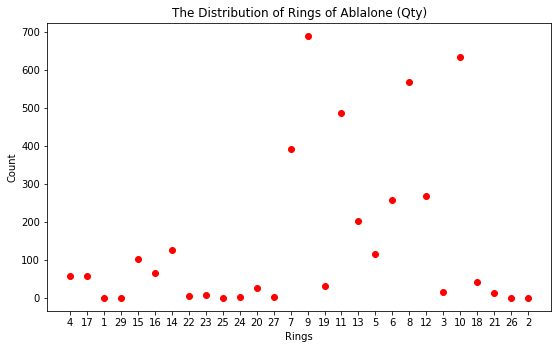

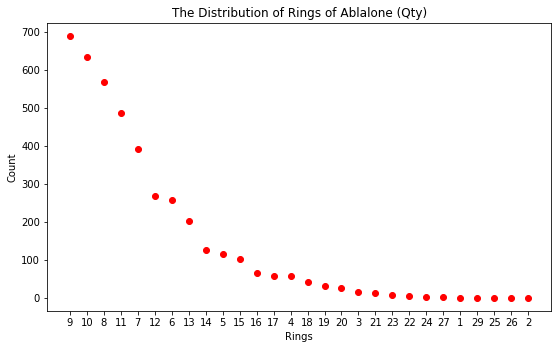

In [43]:
#Scatter Plot 1
plt.rcParams["figure.figsize"] = [7, 4]

df3 = df_ring.toPandas()
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df3['Rings'],df3['count(Rings)'], color='r')
ax.set_xlabel('Rings')
ax.set_ylabel('Count')
ax.set_title('scatter plot')
plt.title('The Distribution of Rings of Ablalone (Qty)')
plt.show()

#Scatter Plot 2
df3 = df_ring_1.toPandas()
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df3['Rings'],df3['count(Rings)'], color='r')
ax.set_xlabel('Rings')
ax.set_ylabel('Count')
ax.set_title('scatter plot')
plt.title('The Distribution of Rings of Ablalone (Qty)')
plt.show()

References:-
https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

https://www.researchgate.net/post/Whats-the-acceptable-value-of-Root-Mean-Square-Error-RMSE-Sum-of-Squares-due-to-error-SSE-and-Adjusted-R-square

https://www.nvidia.com/en-us/ai-data-science/spark-ebook/predictive-analytics-spark-machine-learning/
